# Customer Lifetime Value (CLV)

<br>

*Customer Lifetime Value is a monetary value that represents the amount of revenue or profit a customer will give the company over the period of the relationship*

- How to Identify the most profitable customers?
- How can a company offer the best product and make the most money?
- How to segment profitable customers?
- How much budget need to spend to acquire customers?

## Calculate Customer Lifetime Value
1. **(Basic approach)** You can compute it by adding profit/revenue from customers in a given cycle. For Example, If the customer is associated with you for the last 3 years, you can sum all the profit in this 3 years. You can average the profit yearly or half-yearly or monthly, but in this approach, you cannot able to build a predictive model for new customers.

2. Build **a regression model** for existing customers. Take recent six-month data as independent variables and total revenue over three years as a dependent variable and build a regression model on this data.
> 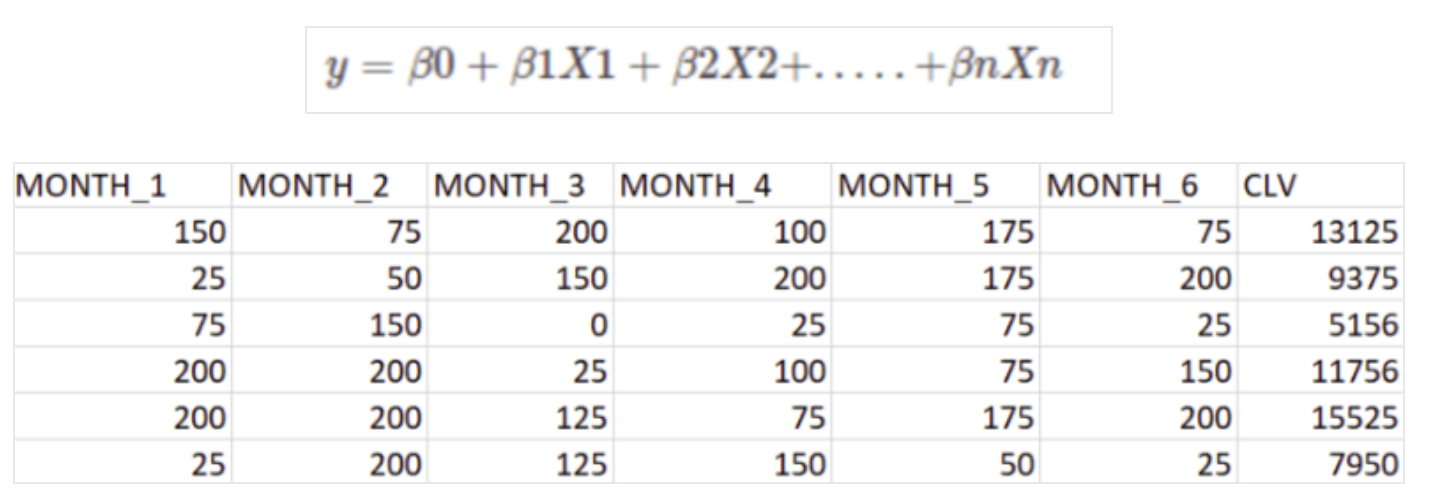

3. CLTV can also implement using **RFM(Recency, Frequency, Monetary) values**

4. Using the following equation: **CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin**
> Customer Value = Average Order Value * Purchase Frequency
- **Average Order Value(AOV)**: The Average Order value is the ratio of your total revenue and the total number of orders. AOV represents the mean amount of revenue that the customer spends on an order.
> Average Order Value = Total Revenue / Total Number of Orders
- **Purchase Frequency(PF)**: Purchase Frequency is the ratio of the total number of orders and the total number of customer. It represents the average number of orders placed by each customer.
> Purchase Frequency =  Total Number of Orders / Total Number of Customers
- **Churn Rate**: Churn Rate is the percentage of customers who have not ordered again.
- **Customer Lifetime**: Customer Lifetime is the period of time that the customer has been continuously ordering.
> Customer Lifetime=1/Churn Rate
- **Repeat Rate**: Repeat rate can be defined as the ratio of the number of customers with more than one order to the number of unique customers. Example: If you have 10 customers in a month out of who 4 come back, your repeat rate is 40%.
> Churn Rate= 1-Repeat Rate


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [90]:
df = pd.read_excel("/QXJ/Python/Datacamp/Marketing/Online_Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [18]:
df.shape

(541909, 8)

In [91]:
filtered_df = df[['Country','CustomerID']].drop_duplicates()
filtered_df

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0
...,...,...
536969,United Kingdom,13436.0
537255,United Kingdom,15520.0
538064,United Kingdom,13298.0
538812,United Kingdom,14569.0


In [92]:
filtered_df.isna().sum()

Country       0
CustomerID    9
dtype: int64

In [93]:
filtered_df.dropna()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0
...,...,...
536969,United Kingdom,13436.0
537255,United Kingdom,15520.0
538064,United Kingdom,13298.0
538812,United Kingdom,14569.0


<AxesSubplot:>

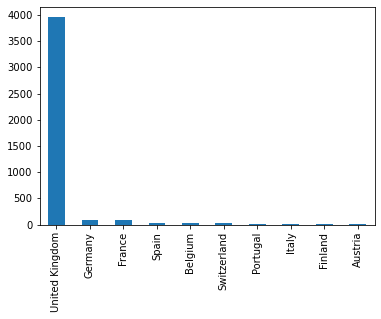

In [94]:
# top 10 country's customer
filtered_df['Country'].value_counts()[:10].plot(kind = 'bar')

In [95]:
# filter cusomters from UK
uk_df = df[df['Country'] == 'United Kingdom']
uk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    495478 non-null  object        
 1   StockCode    495478 non-null  object        
 2   Description  494024 non-null  object        
 3   Quantity     495478 non-null  int64         
 4   InvoiceDate  495478 non-null  datetime64[ns]
 5   UnitPrice    495478 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      495478 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.0+ MB


In [97]:
uk_df.describe()

,Quantity,UnitPrice,CustomerID
count,495478.000000,495478.000000,361878.000000
mean,8.605486,4.532422,15547.871368
std,227.588756,99.315438,1594.402590
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15514.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


*you can observe some of the customers have ordered in a negative quantity, which is not possible. So, you need to filter Quantity greater than zero*

In [98]:
uk_df = uk_df[uk_df['Quantity'] > 0]
uk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486286 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    486286 non-null  object        
 1   StockCode    486286 non-null  object        
 2   Description  485694 non-null  object        
 3   Quantity     486286 non-null  int64         
 4   InvoiceDate  486286 non-null  datetime64[ns]
 5   UnitPrice    486286 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      486286 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.4+ MB


### 1. Filter required Columns and calculate CLV
*Here, you can filter the necessary columns for calculating CLTV. You only need her five columns CustomerID, InvoiceDate, InvoiceNo, Quantity, and UnitPrice.*

- **CustomerID** will uniquely define your customers.
- **InvoiceDate** help you calculate numbers of days customer stayed with your product.
- **InvoiceNo** helps you to count the number of time transaction performed(frequency).
- **Quantity** is purchased item units in each transaction
- **UnitPrice** of each unit purchased by the customer will help you to calculate the total purchased amount.

In [99]:
uk_df = uk_df[['CustomerID', 'InvoiceDate', 'InvoiceNo',
               'Quantity', 'UnitPrice']].reset_index(drop = True)
# add a total price
uk_df['tot_value'] = uk_df['Quantity'] * uk_df['UnitPrice']
uk_df.head(2)

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,tot_value
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


- Calculate the number of days between the present date and the date of last purchase from each customer.
- Calculate the number of orders for each customer.
- Calculate sum of purchase price for each customer.

In [111]:
"""uk_data_group=uk_df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (date.max() - date.min()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Quantity': lambda quant: quant.sum(),
                                        'tot_value': lambda price: price.sum()})
uk_data_group.head()"""

,InvoiceDate,InvoiceNo,Quantity,tot_value
CustomerID,,,,
12346.0,0,1,74215,77183.60
12747.0,366,103,1275,4196.01
12748.0,372,4596,25748,33719.73
12749.0,209,199,1471,4090.88
12820.0,323,59,722,942.34


In [104]:
uk_df_group = uk_df.groupby('CustomerID')\
.agg({'InvoiceDate': lambda date: (date.max() - date.min()).days,
      'InvoiceNo':'count', 'tot_value':'sum', 'Quantity': 'sum'})
uk_df_group.head()

,InvoiceDate,InvoiceNo,tot_value,Quantity
CustomerID,,,,
12346.0,0,1,77183.60,74215
12747.0,366,103,4196.01,1275
12748.0,372,4596,33719.73,25748
12749.0,209,199,4090.88,1471
12820.0,323,59,942.34,722


In [112]:
uk_df_n = pd.DataFrame(uk_df_group)
uk_df_n.columns = ['num_days', 'num_orders', 'tot_value','quantity']
uk_df_n

,num_days,num_orders,tot_value,quantity
CustomerID,,,,
12346.0,0,1,77183.60,74215
12747.0,366,103,4196.01,1275
12748.0,372,4596,33719.73,25748
12749.0,209,199,4090.88,1471
12820.0,323,59,942.34,722
...,...,...,...,...
18280.0,0,10,180.60,45
18281.0,0,7,80.82,54
18282.0,118,12,178.05,103


> CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.

> Customer Value = Average Order Value * Purchase Frequency


#### 1. Calculate Average Order Value

In [113]:
uk_df_n['avg_order_value'] = uk_df_n['tot_value'] / uk_df_n['num_orders']
uk_df_n.head()

,num_days,num_orders,tot_value,quantity,avg_order_value
CustomerID,,,,,
12346.0,0,1,77183.60,74215,77183.600000
12747.0,366,103,4196.01,1275,40.737961
12748.0,372,4596,33719.73,25748,7.336756
12749.0,209,199,4090.88,1471,20.557186
12820.0,323,59,942.34,722,15.971864


#### 2. Calculate Purchase Frequency

In [114]:
purchase_freq = sum(uk_df_n['num_orders'])/uk_df_n.shape[0]
purchase_freq

90.37107880642694

#### 3. Calculate Repeat Rate and Churn Rate

In [115]:
# repeat rate
repeat_rate = uk_df_n[uk_df_n['num_orders']>1].shape[0]/uk_df_n.shape[0]
repeat_rate

0.9818923743942872

In [116]:
# churn rate
churn_rate = 1 - repeat_rate
churn_rate

0.018107625605712774

In [117]:
print((purchase_freq, repeat_rate, churn_rate))

(90.37107880642694, 0.9818923743942872, 0.018107625605712774)


#### 4. Calculate Profit Margin

<br>

*Profit margin is the commonly used profitability ratio. It represents how much percentage of total sales has earned as the gain. Let's assume our business has approx 5% profit on the total sale.*

In [120]:
# profit margin
uk_df_n['profit_margin'] = uk_df_n['tot_value'] * 0.05
uk_df_n.head()

,num_days,num_orders,tot_value,quantity,avg_order_value,profit_margin
CustomerID,,,,,,
12346.0,0,1,77183.60,74215,77183.600000,3859.1800
12747.0,366,103,4196.01,1275,40.737961,209.8005
12748.0,372,4596,33719.73,25748,7.336756,1685.9865
12749.0,209,199,4090.88,1471,20.557186,204.5440
12820.0,323,59,942.34,722,15.971864,47.1170


In [122]:
uk_df_n['CLV'] = uk_df_n['avg_order_value'] * purchase_freq / churn_rate
uk_df_n.head()

,num_days,num_orders,tot_value,quantity,avg_order_value,profit_margin,CLV
CustomerID,,,,,,,
12346.0,0,1,77183.60,74215,77183.600000,3859.1800,3.852060e+08
12747.0,366,103,4196.01,1275,40.737961,209.8005,2.033140e+05
12748.0,372,4596,33719.73,25748,7.336756,1685.9865,3.661610e+04
12749.0,209,199,4090.88,1471,20.557186,204.5440,1.025963e+05
12820.0,323,59,942.34,722,15.971864,47.1170,7.971198e+04


In [123]:
uk_df_n['cust_lifetime_value'] = uk_df_n['CLV'] * uk_df_n['profit_margin']
uk_df_n.head()

,num_days,num_orders,tot_value,quantity,avg_order_value,profit_margin,CLV,cust_lifetime_value
CustomerID,,,,,,,,
12346.0,0,1,77183.60,74215,77183.600000,3859.1800,3.852060e+08,1.486579e+12
12747.0,366,103,4196.01,1275,40.737961,209.8005,2.033140e+05,4.265538e+07
12748.0,372,4596,33719.73,25748,7.336756,1685.9865,3.661610e+04,6.173424e+07
12749.0,209,199,4090.88,1471,20.557186,204.5440,1.025963e+05,2.098545e+07
12820.0,323,59,942.34,722,15.971864,47.1170,7.971198e+04,3.755789e+06


### 2. Prediction Model for CLV
#### predict CLTV using Linear Regression Model

In [124]:
uk_df.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,tot_value
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [128]:
uk_df['month_yr'] = uk_df['InvoiceDate'].apply(lambda x: x.strftime('%b-%Y'))
uk_df.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,tot_value,month_yr
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30,Dec-2010
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00,Dec-2010
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010


In [129]:
uk = uk_df.pivot_table(index = 'CustomerID', 
                       columns = 'month_yr', values = 'tot_value', 
                       aggfunc = 'sum', fill_value = 0).reset_index()
uk.head()

month_yr,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011
0,12346.0,0.00,0.00,0.00,0.00,0.00,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,12747.0,0.00,301.70,706.27,438.50,0.00,303.04,0.00,376.30,310.78,771.31,312.73,675.38,0.00
2,12748.0,1100.37,898.24,4228.13,1070.27,389.64,418.77,1113.27,2006.26,1179.37,2234.50,10639.23,2292.84,6148.84
3,12749.0,0.00,1896.13,0.00,763.06,0.00,0.00,0.00,0.00,0.00,859.10,572.59,0.00,0.00
4,12820.0,0.00,0.00,0.00,210.35,0.00,170.46,0.00,0.00,0.00,0.00,0.00,343.76,217.77


In [130]:
uk['CLV'] = uk.iloc[:, 2:].sum(axis=1)
uk.head()

month_yr,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011,CLV
0,12346.0,0.00,0.00,0.00,0.00,0.00,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,77183.60
1,12747.0,0.00,301.70,706.27,438.50,0.00,303.04,0.00,376.30,310.78,771.31,312.73,675.38,0.00,4196.01
2,12748.0,1100.37,898.24,4228.13,1070.27,389.64,418.77,1113.27,2006.26,1179.37,2234.50,10639.23,2292.84,6148.84,32619.36
3,12749.0,0.00,1896.13,0.00,763.06,0.00,0.00,0.00,0.00,0.00,859.10,572.59,0.00,0.00,4090.88
4,12820.0,0.00,0.00,0.00,210.35,0.00,170.46,0.00,0.00,0.00,0.00,0.00,343.76,217.77,942.34


#### Selecting feature
*divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables). Select latest 6 month as independent variable.*

In [132]:
X = uk[['Dec-2011','Nov-2011', 'Oct-2011','Sep-2011','Aug-2011','Jul-2011']]
y = uk[['CLV']]

#### Splitting data

In [135]:
#split training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

#### Model development

In [136]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [137]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

[208.50969617]
[[0.99880551 0.80381254 1.60226829 1.67433228 1.52860813 2.87959449]]


#### How well does the model fit the data?

In [139]:
from sklearn import metrics

# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))

R-Square: 0.9666074402817512


*This model has a higher R-squared (0.96). This model provides a better fit to the data.*

#### Evaluate the model
For regression problems following evaluation metrics used (Ritchie Ng):

- **Mean Absolute Error (MAE)** is the mean of the absolute value of the errors.
- **Mean Squared Error (MSE)** is the mean of the squared errors.
- **Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors.

In [140]:
# calculate MAE using scikit-learn
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

#calculate mean squared error
print("MSE",metrics.mean_squared_error(y_test, y_pred))
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 595.0282284701236
MSE 2114139.8898678934
RMSE: 1454.0082151995887


*RMSE is more popular than MSE and MAE because RMSE is interpretable with y because of the same units.*

### 3. Pros and Cons of CLTV

<br>

*CLTV helps you to design an effective business plan and also provide a chance to scale your business. CLTV draw meaningful customer segments these segment can help you to identify needs of the different-different segment.*

*.**Customer Lifetime Value** is a tool, not a strategy. CLTV can figure out most profitable customers, but how you are going to make a profit from them, it depends on your strategy. Generally, CLTV models are confused and misused. Obsession with CLTV may create blinders. Companies only focus on finding the best customer group and focusing on them and repeat the business, but it’s also important to give attention to other customers.*